<a href="https://colab.research.google.com/github/FavioMontes15/Analisis-Exploratorio-de-Datos----Entidad-Bancaria/blob/main/LimpiezaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leemos el doc
from google.colab import drive
drive.mount('/content/drive')

ruta="/content/drive/MyDrive/exploratory data analysis (EDA)/tutorial_analisis_datos_yt/dataset_banco.csv"
data=pd.read_csv(ruta)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head(12)

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


### PASAMOS A LA LIMPIEZA

1.  Verificamos datos faltantes
2.  Columnas irrelevantes
3.  Outliers(valores alejados)






#### Datos Faltantes
Las columnas (job,marital,education,balance,duration y pdays) les faltan datos, eliminaremos dichas filas puesto que son pocos los datos faltantes.

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


#### Columnas irrelevantes

Si las columnas categoricas tiene un solo nivel, o si la columna numerica tiene un solo valor.


In [ ]:
cols_cat=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

for col in cols_cat:
  print(f' {col}: {data[col].nunique()} subniveles')

 job: 18 subniveles
 marital: 6 subniveles
 education: 10 subniveles
 default: 2 subniveles
 housing: 2 subniveles
 loan: 6 subniveles
 contact: 5 subniveles
 month: 12 subniveles
 poutcome: 6 subniveles
 y: 2 subniveles


##### Verificando columnas numericas:

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


La desviacion estandar es diferente a cero, por lo tanto no se elimina ninguna.

#### Ahora con las filas repetidas

In [ ]:
# Filas repetidas:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(45207, 17)
(45203, 17)


#### Verificando Outliers

Para esto necesitaremos graficas "boxplot" de las columnas numericas.

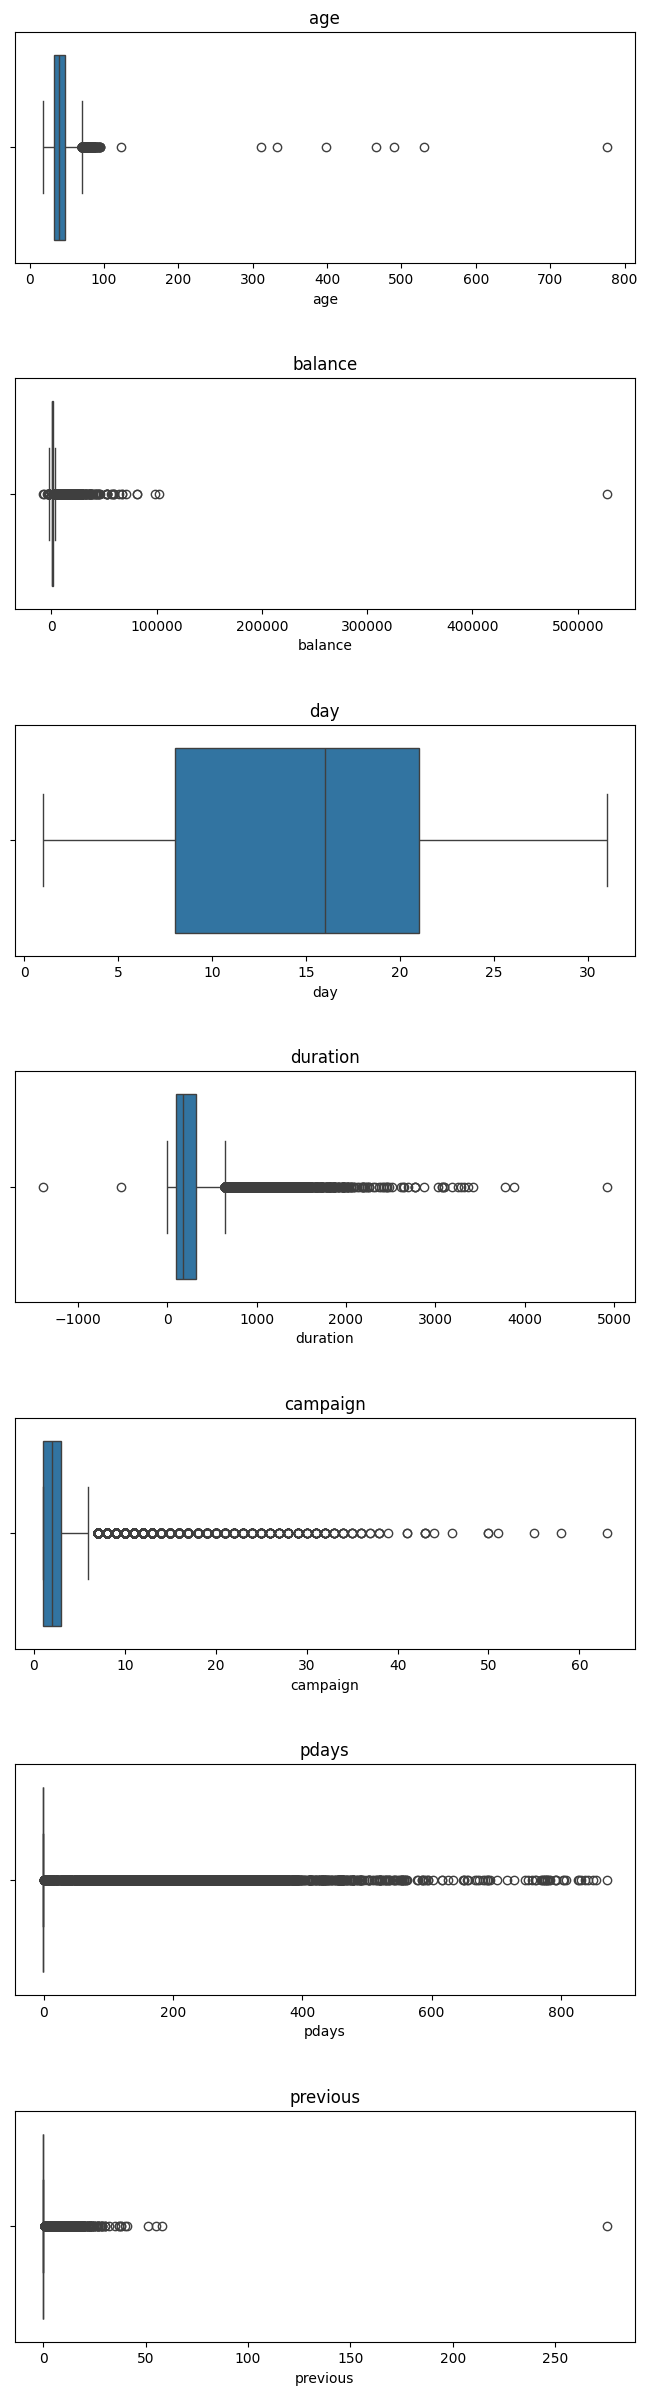

In [ ]:
cols_num=['age','balance','day','duration','campaign','pdays','previous']
fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(cols_num):
  sns.boxplot(x=col,data=data,ax=ax[i])
  ax[i].set_title(col)

- Age: gente mayor a 100 años.
- Duration: Tiempo de llamada no puede ser negativo.
- previous: Valor muy alto.

In [ ]:
#Eliminamos filas con age mayores a 100
print(f'dataSet antes de eliminar {data.shape}')
data=data[data['age']<=100]
print(f'dataSet despues de eliminar {data.shape}')

dataSet antes de eliminar (45203, 17)
dataSet despues de eliminar (45195, 17)


In [ ]:
#Eliminamos filas de duration con llamadas negativas.
print(f'dataSet antes de eliminar {data.shape}')
data=data[data['duration']>0]
print(f'dataSet despues de eliminar {data.shape}')

dataSet antes de eliminar (45195, 17)
dataSet despues de eliminar (45190, 17)


In [ ]:
#Eliminamos filas de previous con valores muy altos.
print(f'dataSet antes de eliminar {data.shape}')
data=data[data['previous']<=100]
print(f'dataSet despues de eliminar {data.shape}')

dataSet antes de eliminar (45190, 17)
dataSet despues de eliminar (45189, 17)


#### Errores Tipograficos en var. categoricas

<ipython-input-480-64fa5f76aef5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-480-64fa5f76aef5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-480-64fa5f76aef5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-480-64fa5f76aef5>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-480-64fa5f76aef5>:9: UserWarning: set_tic

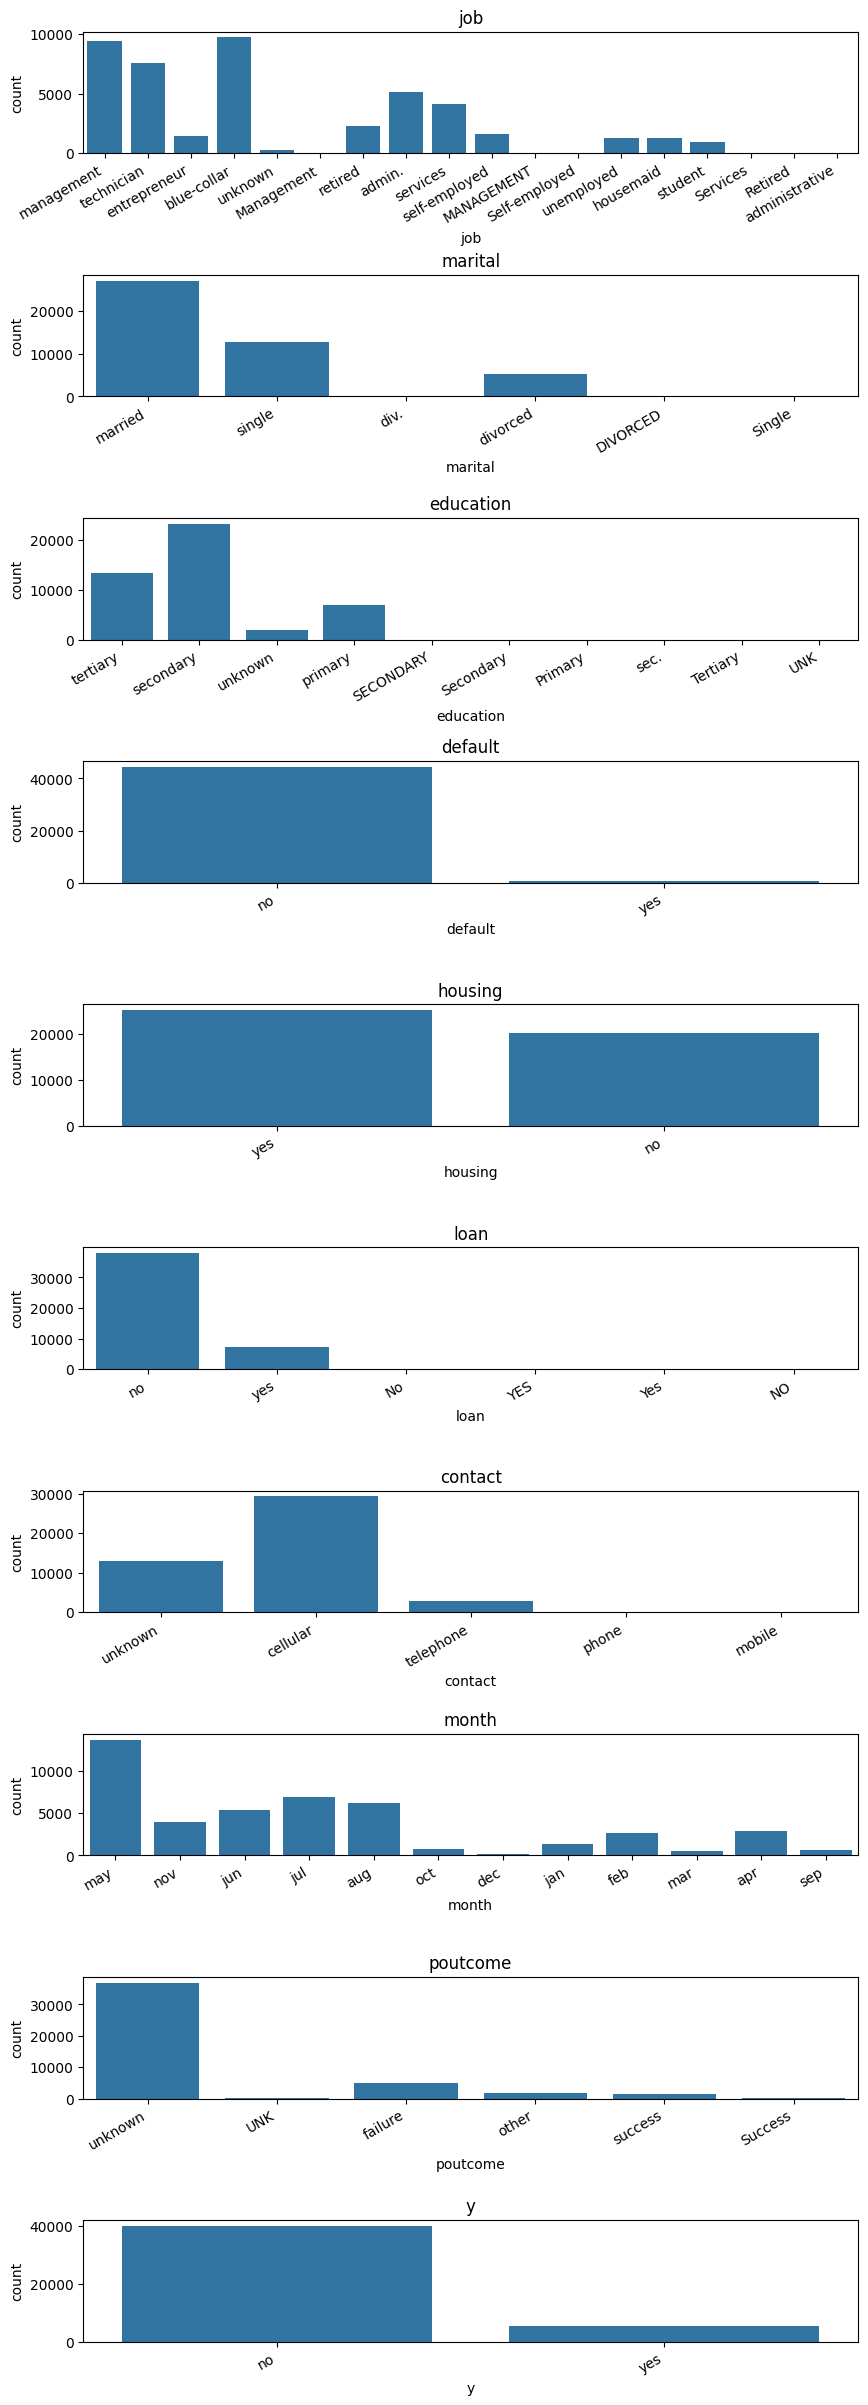

In [ ]:
cols_cat=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(cols_cat):
  sns.countplot(x=col,data=data,ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")

<ipython-input-481-0b21d2de79cd>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-481-0b21d2de79cd>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-481-0b21d2de79cd>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-481-0b21d2de79cd>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")
<ipython-input-481-0b21d2de79cd>:12: UserWarning: se

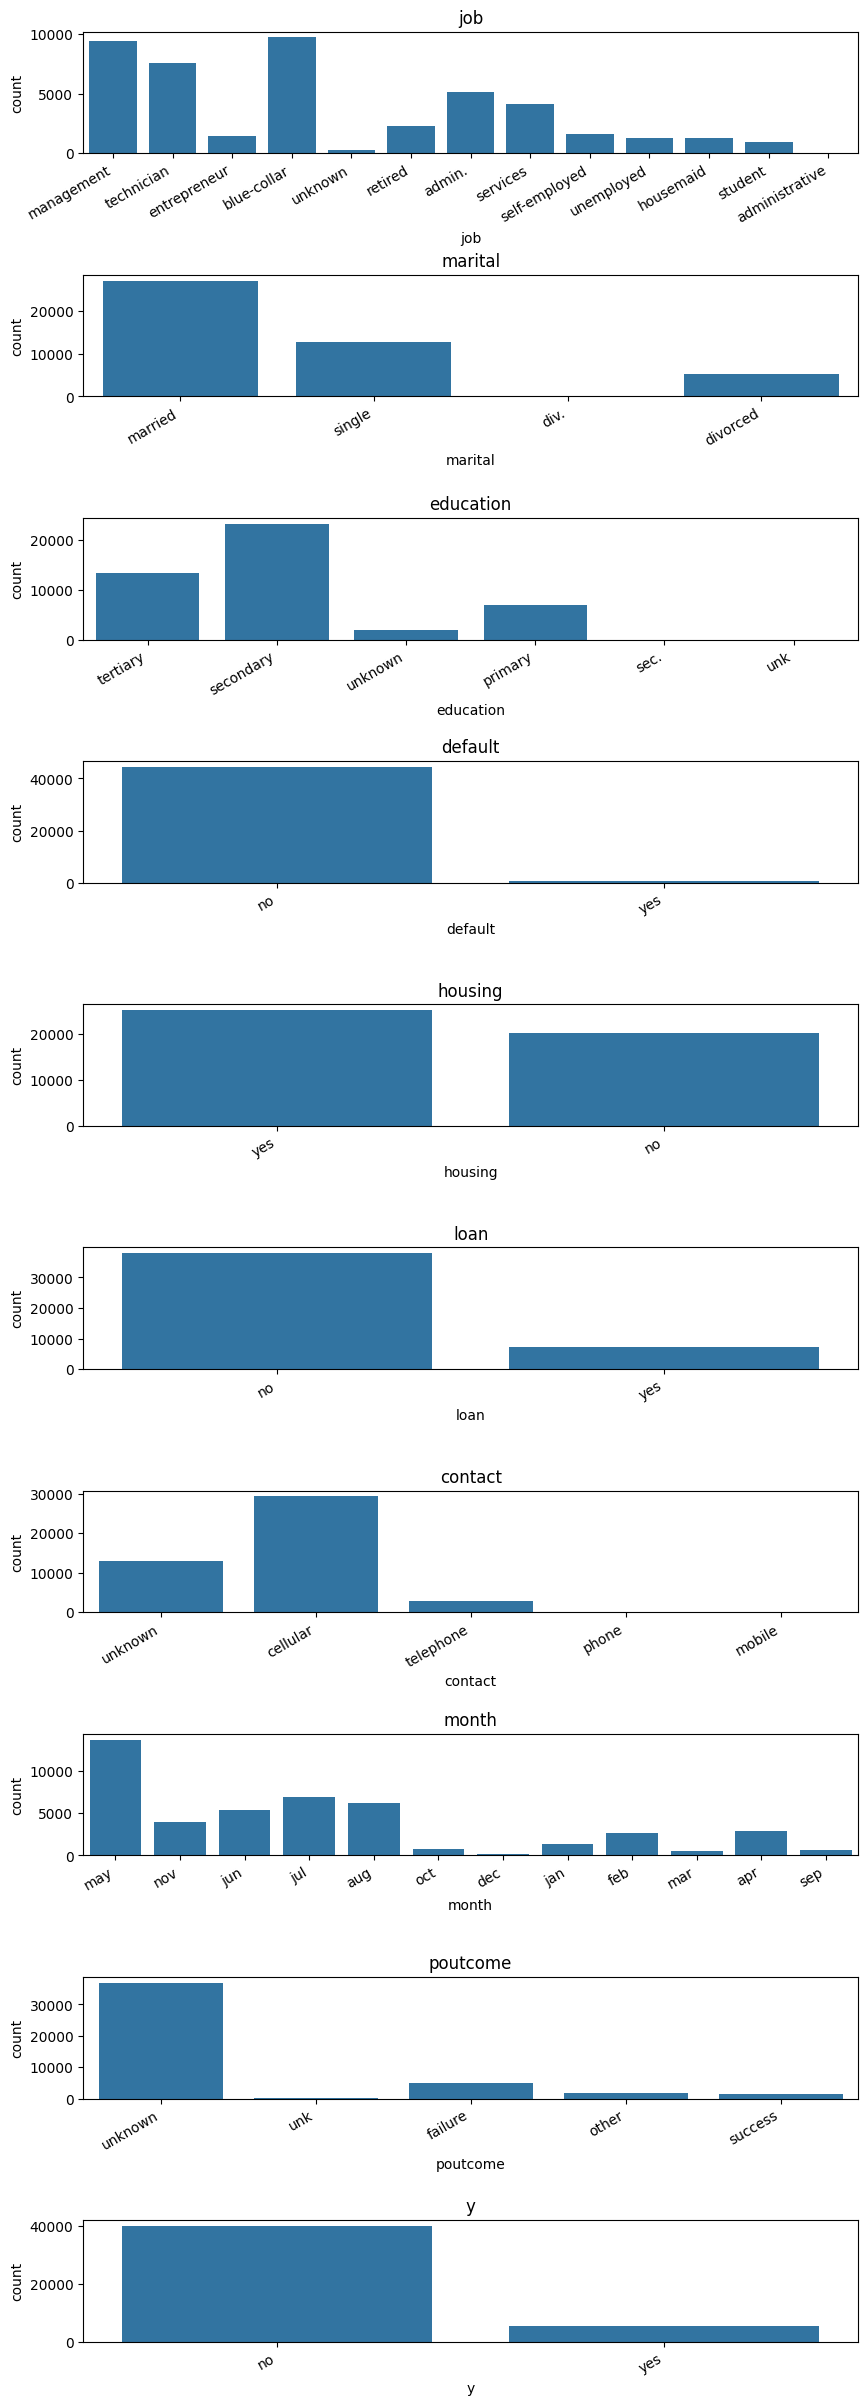

In [ ]:
#Se arregla los errores tipograficos: Transformamos las palabras a minusculas
for column in data.columns:
  if column in cols_cat:
    data[column]=data[column].str.lower()
#Volvemos a imprimir
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(cols_cat):
  sns.countplot(x=col,data=data,ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30,ha="right")

In [ ]:
#job
data['job']=data['job'].str.replace('admin.','administrative',regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
#marital
data['marital']=data['marital'].str.replace('div.','divorced',regex=False)
print(data['marital'].unique())

['married' 'single' 'divorced']


In [ ]:
#Education
data['education']=data['education'].str.replace('sec.','secondary',regex=False)
data['education']=data['education'].str.replace(r'^unk$','unknown',regex=True)
print(data['education'].unique())


['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
#contact
data['contact']=data['contact'].str.replace(r'^phone$','telephone',regex=True)
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'mobile']


In [ ]:
#poutcome
data['poutcome'] = data['poutcome'].str.replace(r'^unk$', 'unknown', regex=True)
print(data['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [ ]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [ ]:
data['contact'].value_counts()


,count
contact,
cellular,29271
unknown,13011
telephone,2904
mobile,3


In [ ]:
data.shape

(45189, 17)

#### Guardamos el set de datos para realizar el EDA

In [ ]:
ruta="/content/drive/MyDrive/exploratory data analysis (EDA)/tutorial_analisis_datos_yt/dataset_banco_clean.csv"
data.to_csv(ruta)